In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [3]:
df = pd.read_parquet("/Users/YGT/ist-airport-decision-support-system/data/bronze/flight_information/all_flights.parquet")

In [4]:
df.head()

,date,day_of_week,hour_ist,hex_icao,aircraft_type,aircraft_registration,airline_name_english,callsign_code_iata,callsign_code_icao,airline_iata,airline_icao,dep_code_iata,dep_code_icao,dep_name_english,dest_code_iata,dest_code_icao,dest_name_english,dest_lat,dest_lon,dest_altitude,arr_sched_time_utc,arr_revised_time_utc,status
0,2025-07-31,Thursday,19,NaN,Boeing 737-800,NaN,Turkish,TK 2741,NaN,TK,THY,AJI,LTCO,Agri,IST,LTFM,Istanbul Airport,41.2751,28.7519,325,2025-07-31 16:20:00+00:00,2025-07-31 18:25Z,Arrived
1,2025-07-31,Thursday,20,NaN,Airbus A320,NaN,UR,UD 761,NaN,UD,UBD,EBL,ORER,Arbil,IST,LTFM,Istanbul Airport,41.2751,28.7519,325,2025-07-31 17:45:00+00:00,2025-07-31 18:10Z,Arrived
2,2025-07-31,Thursday,20,NaN,NaN,NaN,Turkish,TK 6899,NaN,TK,THY,OUA,DFFD,Ouagadougou,IST,LTFM,Istanbul Airport,41.2751,28.7519,325,2025-07-31 17:50:00+00:00,2025-07-31 18:35Z,Arrived
3,2025-07-31,Thursday,21,728678,Airbus A320,YI-ASX,I A W,IA 223,IAW223,IA,IAW,BGW,ORBI,Baghdad,IST,LTFM,Istanbul Airport,41.2751,28.7519,325,2025-07-31 18:00:00+00:00,2025-07-31 18:00Z,Arrived
4,2025-07-31,Thursday,21,NaN,NaN,NaN,Berniq Airways,NB 303,NaN,NaN,NaN,BEN,HLLB,Benghazi,IST,LTFM,Istanbul Airport,41.2751,28.7519,325,2025-07-31 18:00:00+00:00,2025-07-31 19:00Z,Arrived


In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 176954 entries, 0 to 176953
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   date                   176954 non-null  str                
 1   day_of_week            176954 non-null  str                
 2   hour_ist               176954 non-null  int64              
 3   hex_icao               83757 non-null   str                
 4   aircraft_type          173496 non-null  str                
 5   aircraft_registration  81142 non-null   str                
 6   airline_name_english   176954 non-null  str                
 7   callsign_code_iata     176954 non-null  str                
 8   callsign_code_icao     82489 non-null   str                
 9   airline_iata           175409 non-null  str                
 10  airline_icao           175496 non-null  str                
 11  dep_code_iata          173278 non-null  str       

In [6]:
df["date"] = pd.to_datetime(df["date"]).astype('datetime64[s]')
df['arr_sched_time_utc'] = pd.to_datetime(df['arr_sched_time_utc'], utc=True).dt.floor('s').astype('datetime64[s, UTC]')
df['arr_revised_time_utc'] = pd.to_datetime(df['arr_revised_time_utc'], utc=True).dt.floor('s').astype('datetime64[s, UTC]')

In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 176954 entries, 0 to 176953
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype             
---  ------                 --------------   -----             
 0   date                   176954 non-null  datetime64[s]     
 1   day_of_week            176954 non-null  str               
 2   hour_ist               176954 non-null  int64             
 3   hex_icao               83757 non-null   str               
 4   aircraft_type          173496 non-null  str               
 5   aircraft_registration  81142 non-null   str               
 6   airline_name_english   176954 non-null  str               
 7   callsign_code_iata     176954 non-null  str               
 8   callsign_code_icao     82489 non-null   str               
 9   airline_iata           175409 non-null  str               
 10  airline_icao           175496 non-null  str               
 11  dep_code_iata          173278 non-null  str               
 12 

In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 176954 entries, 0 to 176953
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype             
---  ------                 --------------   -----             
 0   date                   176954 non-null  datetime64[s]     
 1   day_of_week            176954 non-null  str               
 2   hour_ist               176954 non-null  int64             
 3   hex_icao               83757 non-null   str               
 4   aircraft_type          173496 non-null  str               
 5   aircraft_registration  81142 non-null   str               
 6   airline_name_english   176954 non-null  str               
 7   callsign_code_iata     176954 non-null  str               
 8   callsign_code_icao     82489 non-null   str               
 9   airline_iata           175409 non-null  str               
 10  airline_icao           175496 non-null  str               
 11  dep_code_iata          173278 non-null  str               
 12 

In [9]:
def clean_string_columns(dataframe):
    text_cols = dataframe.select_dtypes(include=['object', 'string']).columns

    for col in text_cols:
        dataframe[col] = dataframe[col].astype(str).str.strip()

    print(f"{len(text_cols)} row has cleaned.")
    return dataframe

In [10]:
clean_string_columns(df)

16 row has cleaned.


,date,day_of_week,hour_ist,hex_icao,aircraft_type,aircraft_registration,airline_name_english,callsign_code_iata,callsign_code_icao,airline_iata,airline_icao,dep_code_iata,dep_code_icao,dep_name_english,dest_code_iata,dest_code_icao,dest_name_english,dest_lat,dest_lon,dest_altitude,arr_sched_time_utc,arr_revised_time_utc,status
0,2025-07-31,Thursday,19,NaN,Boeing 737-800,NaN,Turkish,TK 2741,NaN,TK,THY,AJI,LTCO,Agri,IST,LTFM,Istanbul Airport,41.2751,28.7519,325,2025-07-31 16:20:00+00:00,2025-07-31 18:25:00+00:00,Arrived
1,2025-07-31,Thursday,20,NaN,Airbus A320,NaN,UR,UD 761,NaN,UD,UBD,EBL,ORER,Arbil,IST,LTFM,Istanbul Airport,41.2751,28.7519,325,2025-07-31 17:45:00+00:00,2025-07-31 18:10:00+00:00,Arrived
2,2025-07-31,Thursday,20,NaN,NaN,NaN,Turkish,TK 6899,NaN,TK,THY,OUA,DFFD,Ouagadougou,IST,LTFM,Istanbul Airport,41.2751,28.7519,325,2025-07-31 17:50:00+00:00,2025-07-31 18:35:00+00:00,Arrived
3,2025-07-31,Thursday,21,728678,Airbus A320,YI-ASX,I A W,IA 223,IAW223,IA,IAW,BGW,ORBI,Baghdad,IST,LTFM,Istanbul Airport,41.2751,28.7519,325,2025-07-31 18:00:00+00:00,2025-07-31 18:00:00+00:00,Arrived
4,2025-07-31,Thursday,21,NaN,NaN,NaN,Berniq Airways,NB 303,NaN,NaN,NaN,BEN,HLLB,Benghazi,IST,LTFM,Istanbul Airport,41.2751,28.7519,325,2025-07-31 18:00:00+00:00,2025-07-31 19:00:00+00:00,Arrived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176949,2025-09-30,Tuesday,21,NaN,Boeing 737-900,NaN,Turkish,TK 2833,NaN,TK,THY,TZX,LTCG,Trabzon,IST,LTFM,Istanbul Airport,41.2751,28.7519,325,2025-09-30 18:05:00+00:00,2025-09-30 17:40:00+00:00,Arrived
176950,2025-09-30,Tuesday,21,NaN,Boeing 737-800,NaN,Turkish,TK 2565,NaN,TK,THY,DLM,LTBS,Dalaman,IST,LTFM,Istanbul Airport,41.2751,28.7519,325,2025-09-30 18:15:00+00:00,2025-09-30 17:45:00+00:00,Arrived
176951,2025-09-30,Tuesday,21,NaN,Boeing 737-800,NaN,Turkish,TK 2709,NaN,TK,THY,ERZ,LTCE,Erzurum,IST,LTFM,Istanbul Airport,41.2751,28.7519,325,2025-09-30 18:15:00+00:00,2025-09-30 17:50:00+00:00,Arrived
176952,2025-09-30,Tuesday,21,NaN,Airbus A319,NaN,Turkish,TK 2845,NaN,TK,THY,NaN,NaN,Sinop,IST,LTFM,Istanbul Airport,41.2751,28.7519,325,2025-09-30 18:20:00+00:00,2025-09-30 17:45:00+00:00,Arrived


## Missing Value Analysis 

In [11]:
def missing_value_ratio(df):
    ratio = df.isna().mean() * 100
    return ratio.round(4).sort_values(ascending=False)

In [12]:
missing_value_ratio(df)

aircraft_registration    54.1451
callsign_code_icao       53.3839
hex_icao                 52.6674
dep_code_iata             2.0774
dep_code_icao             2.0774
aircraft_type             1.9542
airline_iata              0.8731
airline_icao              0.8239
arr_revised_time_utc      0.0526
dest_code_icao            0.0000
arr_sched_time_utc        0.0000
dest_altitude             0.0000
dest_lon                  0.0000
dest_lat                  0.0000
dest_name_english         0.0000
date                      0.0000
dest_code_iata            0.0000
dep_name_english          0.0000
day_of_week               0.0000
callsign_code_iata        0.0000
airline_name_english      0.0000
hour_ist                  0.0000
status                    0.0000
dtype: float64

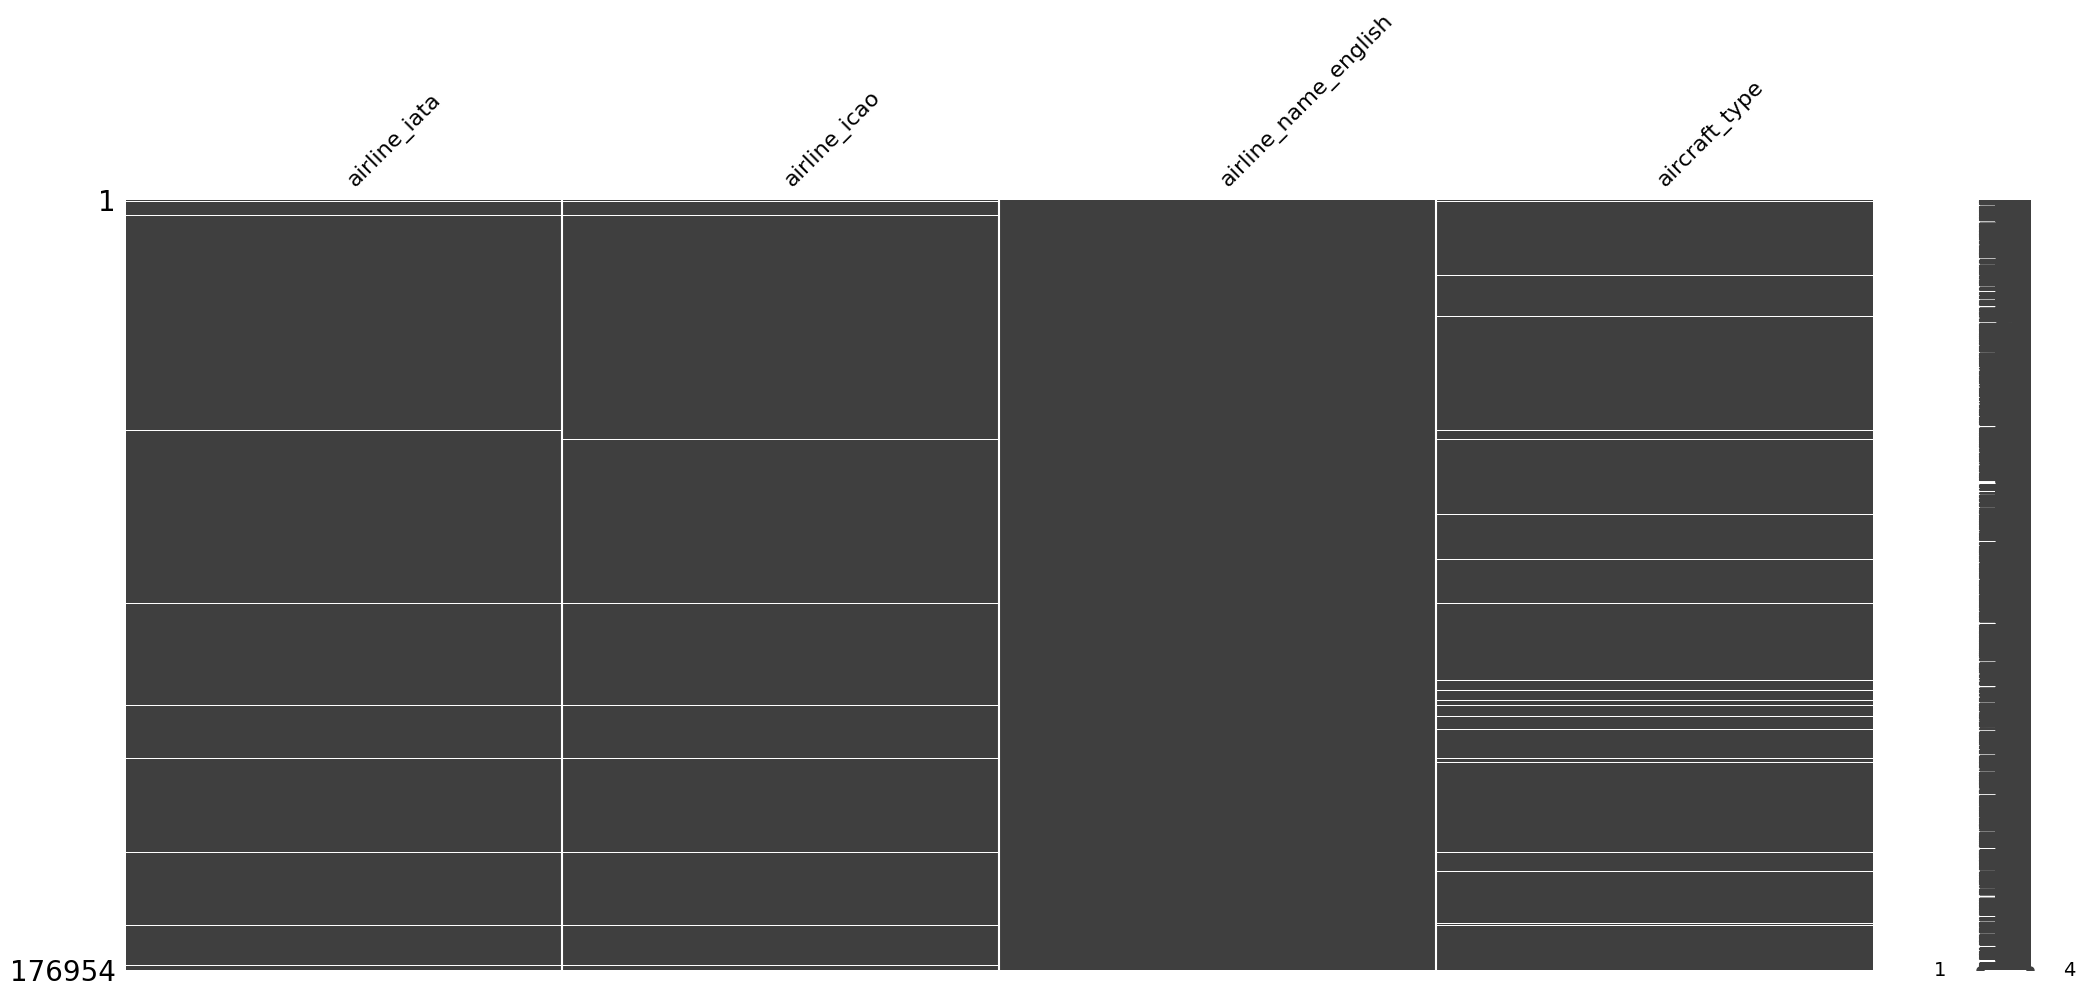

In [13]:
import missingno as msno
import matplotlib.pyplot as plt

cols = ["airline_iata", "airline_icao", "airline_name_english", "aircraft_type"]
msno.matrix(df[cols])
plt.show()

### ICAO & IATA Handling

In [14]:
#  ICAO is null, IATA full
scenario_1 = df[df['airline_icao'].isnull() & df['airline_iata'].notnull()]
s1_names = scenario_1['airline_name_english'].unique()

# ICAO full, IATA null
scenario_2 = df[df['airline_icao'].notnull() & df['airline_iata'].isnull()]
s2_names = scenario_2['airline_name_english'].unique()

# both of them null
scenario_3 = df[df['airline_icao'].isnull() & df['airline_iata'].isnull()]
s3_names = scenario_3['airline_name_english'].unique()

In [15]:
s1_names

<ArrowStringArray>
['One Jet', 'Sun d'Or']
Length: 2, dtype: str

In [16]:
s2_names

<ArrowStringArray>
[            'ATA',  'Flying Service', 'Prince Aviation',  'NetJets Europe',
          'RusJet',    'Comlux Malta',       'Elite Jet',  'Smart Aviation']
Length: 8, dtype: str

In [17]:
manual_iata = {
    'One Jet': '1J', "Sun d'Or": '2U', 'ATA': 'I3'
}

manual_icao = {
    'ATA': 'TBZ', 'One Jet': 'JST', 'Flying Service': 'FYG',
    'Prince Aviation': 'PNC', 'NetJets Europe': 'NJE', 'RusJet': 'RSJ',
    'Comlux Malta': 'MLM', 'Elite Jet': 'ELJ', 'Smart Aviation': 'SNA',
    "Sun d'Or": 'ERO'
}


internal_iata = df.dropna(subset=['airline_iata']).drop_duplicates('airline_name_english').set_index('airline_name_english')['airline_iata'].to_dict()
internal_icao = df.dropna(subset=['airline_icao']).drop_duplicates('airline_name_english')['airline_icao'].to_dict()


df['airline_iata'] = df['airline_iata'].fillna(df['airline_name_english'].map(manual_iata))
df['airline_iata'] = df['airline_iata'].fillna(df['airline_name_english'].map(internal_iata))

df['airline_icao'] = df['airline_icao'].fillna(df['airline_name_english'].map(manual_icao))
df['airline_icao'] = df['airline_icao'].fillna(df['airline_name_english'].map(internal_icao))

In [18]:
df = df.dropna(subset=['airline_iata', 'airline_icao'], how='all')

In [19]:
df.isnull().sum()

date                         0
day_of_week                  0
hour_ist                     0
hex_icao                 92024
aircraft_type             2691
aircraft_registration    94639
airline_name_english         0
callsign_code_iata           0
callsign_code_icao       93360
airline_iata                18
airline_icao                 0
dep_code_iata             3600
dep_code_icao             3600
dep_name_english             0
dest_code_iata               0
dest_code_icao               0
dest_name_english            0
dest_lat                     0
dest_lon                     0
dest_altitude                0
arr_sched_time_utc           0
arr_revised_time_utc        93
status                       0
dtype: int64

In [20]:
df = df.dropna(subset=['airline_iata'])

### dep_code_iata & dep_code_icao handling        

In [21]:
# Scenario 1: IATA exists, ICAO is missing
dep_s1 = df[df['dep_code_icao'].isnull() & df['dep_code_iata'].notnull()]

# Scenario 2: ICAO exists, IATA is missing
dep_s2 = df[df['dep_code_icao'].notnull() & df['dep_code_iata'].isnull()]

# Scenario 3: Both are missing (The "Dark Zone")
dep_s3 = df[df['dep_code_icao'].isnull() & df['dep_code_iata'].isnull()]

print(f"--- Departure Identity Analysis ---")
print(f"Scenario 1 (Only IATA exists): {len(dep_s1)}")
print(f"Scenario 2 (Only ICAO exists): {len(dep_s2)}")
print(f"Scenario 3 (Both Missing): {len(dep_s3)}")

--- Departure Identity Analysis ---
Scenario 1 (Only IATA exists): 0
Scenario 2 (Only ICAO exists): 0
Scenario 3 (Both Missing): 3600


In [22]:
missing_airports = df[df['dep_code_icao'].isnull() & df['dep_code_iata'].isnull()]
print("Count of unique airports with no codes:", missing_airports['dep_name_english'].nunique())
print("\nairport names causing the issue:")
print(missing_airports['dep_name_english'].value_counts())

Count of unique airports with no codes: 15

airport names causing the issue:
dep_name_english
Rize-Artvin     828
Ordu-Giresun    741
Chisinau        568
Sirnak          533
Sinop           317
Hakkari         213
Nouakchott       83
Kraljevo         73
Neom             72
Bishkek          71
Turkistan        53
Banjul           43
Mersin            2
Eilat             2
Chengdu           1
Name: count, dtype: int64


In [23]:
# External mapping for the 15 missing airports
airport_iata_fix = {
    'Rize-Artvin': 'RZV', 'Ordu-Giresun': 'OGU', 'Chisinau': 'RMO',
    'Sirnak': 'NKT', 'Sinop': 'NOP', 'Hakkari': 'YKO', 'Nouakchott': 'NKC',
    'Kraljevo': 'KVO', 'Neom': 'NUM', 'Bishkek': 'FRU', 'Turkistan': 'HSA',
    'Banjul': 'BJL', 'Mersin': 'COV', 'Eilat': 'ETM', 'Chengdu': 'TFU'
}

airport_icao_fix = {
    'Rize-Artvin': 'LTST', 'Ordu-Giresun': 'LTCB', 'Chisinau': 'LUKK',
    'Sirnak': 'LTCW', 'Sinop': 'LTCM', 'Hakkari': 'LTCW', 'Nouakchott': 'GQNO',
    'Kraljevo': 'LYKV', 'Neom': 'OSNH', 'Bishkek': 'UAFM', 'Turkistan': 'UAIT',
    'Banjul': 'GBYD', 'Mersin': 'LTCC', 'Eilat': 'LLER', 'Chengdu': 'ZUTF'
}

# Apply the fix
df['dep_code_iata'] = df['dep_code_iata'].fillna(df['dep_name_english'].map(airport_iata_fix))
df['dep_code_icao'] = df['dep_code_icao'].fillna(df['dep_name_english'].map(airport_icao_fix))

print(f"Remaining nulls in Departure ICAO: {df['dep_code_icao'].isnull().sum()}")

Remaining nulls in Departure ICAO: 0


In [24]:
df.isnull().sum()

date                         0
day_of_week                  0
hour_ist                     0
hex_icao                 92009
aircraft_type             2676
aircraft_registration    94624
airline_name_english         0
callsign_code_iata           0
callsign_code_icao       93346
airline_iata                 0
airline_icao                 0
dep_code_iata                0
dep_code_icao                0
dep_name_english             0
dest_code_iata               0
dest_code_icao               0
dest_name_english            0
dest_lat                     0
dest_lon                     0
dest_altitude                0
arr_sched_time_utc           0
arr_revised_time_utc        93
status                       0
dtype: int64

### callsign_code_icao handling

In [25]:
# Mevcut (dolu olan) IATA ve ICAO eşleşmelerinden rastgele 15 örnek görelim
print(df[df['callsign_code_icao'].notnull()][['callsign_code_iata', 'callsign_code_icao', 'airline_icao', "hex_icao"]].sample(15))

       callsign_code_iata callsign_code_icao airline_icao hex_icao
32761             TK 2439             THY6VJ          THY   4BAA8C
73659             LH 1300            DLH1300          DLH   3C6487
148992             TK 642             THY642          THY   4BA90B
29221              TK 373             THY373          THY   4BB275
53564              TK 438             THY438          THY   4BAA1A
63848             TK 1702            THY1702          THY   4BAA74
135318            TK 2609             THY9AL          THY   4BAA14
79862             TK 2419             THY97N          THY   4BAAC5
84386             TK 1674             THY30T          THY   4BAB46
30003             TK 1872             THY3NR          THY   4BA90B
95927             TK 1526             THY7AT          THY   4BB208
149712              TK 69              THY69          THY   4BB18F
2195               TK 204             THY8JK          THY   4BB0ED
19923              TK 173             THY173          THY   4B

In [26]:
def synthesize_icao_callsign(df):
    """
    Focused strictly on synthesizing 'callsign_code_icao' using:
    airline_icao + digits from callsign_code_iata
    """

    def combine_logic(row):

        if pd.notna(row['callsign_code_icao']) and str(row['callsign_code_icao']).strip() != "":
            return str(row['callsign_code_icao']).strip()

        # 'TK 2741' -> '2741'
        iata_val = str(row['callsign_code_iata'])
        flight_digits = "".join(re.findall(r'\d+', iata_val))

        # 'THY' + '2741' -> 'THY2741'
        airline_prefix = str(row['airline_icao']) if pd.notna(row['airline_icao']) else "UNK"

        return f"{airline_prefix}{flight_digits}"

    print("Synthesizing: airline_icao + flight numbers -> callsign_code_icao")
    df['callsign_code_icao'] = df.apply(combine_logic, axis=1)

    return df

df = synthesize_icao_callsign(df)

Synthesizing: airline_icao + flight numbers -> callsign_code_icao


In [27]:
df["callsign_code_icao"].sample(10)

26825      THY1GY
173996     JAV271
105193     THY8VL
14537     THY2543
9201      THY2333
129574     THY664
72588     THY2411
100404     SVA259
80564      THY59F
83837      RJA163
Name: callsign_code_icao, dtype: str

In [28]:
df.isna().sum()

date                         0
day_of_week                  0
hour_ist                     0
hex_icao                 92009
aircraft_type             2676
aircraft_registration    94624
airline_name_english         0
callsign_code_iata           0
callsign_code_icao           0
airline_iata                 0
airline_icao                 0
dep_code_iata                0
dep_code_icao                0
dep_name_english             0
dest_code_iata               0
dest_code_icao               0
dest_name_english            0
dest_lat                     0
dest_lon                     0
dest_altitude                0
arr_sched_time_utc           0
arr_revised_time_utc        93
status                       0
dtype: int64

### hex_icao handling

In [29]:
df.columns

Index(['date', 'day_of_week', 'hour_ist', 'hex_icao', 'aircraft_type',
       'aircraft_registration', 'airline_name_english', 'callsign_code_iata',
       'callsign_code_icao', 'airline_iata', 'airline_icao', 'dep_code_iata',
       'dep_code_icao', 'dep_name_english', 'dest_code_iata', 'dest_code_icao',
       'dest_name_english', 'dest_lat', 'dest_lon', 'dest_altitude',
       'arr_sched_time_utc', 'arr_revised_time_utc', 'status'],
      dtype='str')

In [30]:
df[["hex_icao", "arr_sched_time_utc", "status", "airline_name_english"]].sample(10)

,hex_icao,arr_sched_time_utc,status,airline_name_english
164738,4BAA79,2025-09-09 07:55:00+00:00,Arrived,Turkish
60993,4BB210,2025-05-25 06:35:00+00:00,Arrived,Turkish
127707,4BB20E,2025-07-29 11:45:00+00:00,Arrived,Turkish
60965,NaN,2025-05-25 03:25:00+00:00,Arrived,Turkish
71715,4BB28B,2025-12-14 17:45:00+00:00,Arrived,Turkish
123849,NaN,2025-07-22 16:55:00+00:00,Arrived,Turkish
163015,4BB073,2025-09-06 09:30:00+00:00,Arrived,Turkish
116007,4BB1ED,2025-07-09 02:45:00+00:00,Arrived,Turkish
66674,NaN,2025-12-05 01:20:00+00:00,Arrived,Air Serbia
8101,4BAA7A,2025-08-14 20:15:00+00:00,Arrived,Turkish


In [31]:
df.groupby("arr_sched_time_utc")["hex_icao"].count()

arr_sched_time_utc
2025-02-28 17:35:00+00:00    1
2025-02-28 18:10:00+00:00    1
2025-02-28 18:15:00+00:00    1
2025-02-28 18:20:00+00:00    1
2025-02-28 18:25:00+00:00    1
                            ..
2026-01-31 17:55:00+00:00    0
2026-01-31 18:00:00+00:00    1
2026-01-31 18:05:00+00:00    0
2026-01-31 18:15:00+00:00    1
2026-01-31 18:20:00+00:00    1
Name: hex_icao, Length: 68740, dtype: int64

In [ ]:
subset_cols = ["arr_sched_time_utc", "airline_name_english", "hex_icao"]

duplicates = df[df.duplicated(subset=["arr_sched_time_utc", "airline_name_english"], keep=False)]

check_df = duplicates[subset_cols].sort_values(by=["arr_sched_time_utc", "airline_name_english"])

In [33]:
len(check_df)

118592

In [34]:
check_df

,arr_sched_time_utc,airline_name_english,hex_icao
96523,2025-02-28 18:45:00+00:00,Turkish,NaN
96524,2025-02-28 18:45:00+00:00,Turkish,NaN
96525,2025-02-28 18:45:00+00:00,Turkish,NaN
96526,2025-02-28 19:00:00+00:00,Turkish,4BAAC8
96528,2025-02-28 19:00:00+00:00,Turkish,4BB206
...,...,...,...
159769,2026-01-31 16:35:00+00:00,Turkish,NaN
159773,2026-01-31 17:00:00+00:00,Turkish,4BAA7A
159775,2026-01-31 17:00:00+00:00,Turkish,NaN
159782,2026-01-31 17:50:00+00:00,Turkish,NaN


In [35]:
df = df.dropna(subset=['hex_icao'])

In [36]:
df.isna().sum()

date                        0
day_of_week                 0
hour_ist                    0
hex_icao                    0
aircraft_type               0
aircraft_registration    2683
airline_name_english        0
callsign_code_iata          0
callsign_code_icao          0
airline_iata                0
airline_icao                0
dep_code_iata               0
dep_code_icao               0
dep_name_english            0
dest_code_iata              0
dest_code_icao              0
dest_name_english           0
dest_lat                    0
dest_lon                    0
dest_altitude               0
arr_sched_time_utc          0
arr_revised_time_utc       38
status                      0
dtype: int64

### aircraft_registration  handling

In [ ]:
reg_check = df.groupby('hex_icao')['aircraft_registration'].agg(
    unique_count=lambda x: x.nunique(dropna=True),
    unique_values=lambda x: x.dropna().unique().tolist(),
    total_records='count',
    null_count=lambda x: x.isnull().sum() # Kaç tanesi boş?
).reset_index()
reg_check

,hex_icao,unique_count,unique_values,total_records,null_count
0,0100DB,1,[SU-GCM],18,0
1,0100DC,1,[SU-GCN],18,0
2,0100DD,1,[SU-GCO],12,0
3,0100DF,1,[SU-GCR],14,0
4,0100E0,1,[SU-GCS],18,0
...,...,...,...,...,...
2781,C07998,1,[C-GUBF],2,0
2782,C0799A,1,[C-GUBH],1,0
2783,C079A6,1,[C-GUBT],1,0
2784,C07A0F,1,[C-GUFU],1,0


In [46]:
hex_reg_map = df.dropna(subset=['aircraft_registration']).drop_duplicates('hex_icao').set_index('hex_icao')['aircraft_registration']

df['aircraft_registration'] = df['aircraft_registration'].fillna(df['hex_icao'].map(hex_reg_map))

In [47]:
df.isna().sum()

date                        0
day_of_week                 0
hour_ist                    0
hex_icao                    0
aircraft_type               0
aircraft_registration    2114
airline_name_english        0
callsign_code_iata          0
callsign_code_icao          0
airline_iata                0
airline_icao                0
dep_code_iata               0
dep_code_icao               0
dep_name_english            0
dest_code_iata              0
dest_code_icao              0
dest_name_english           0
dest_lat                    0
dest_lon                    0
dest_altitude               0
arr_sched_time_utc          0
arr_revised_time_utc       38
status                      0
dtype: int64

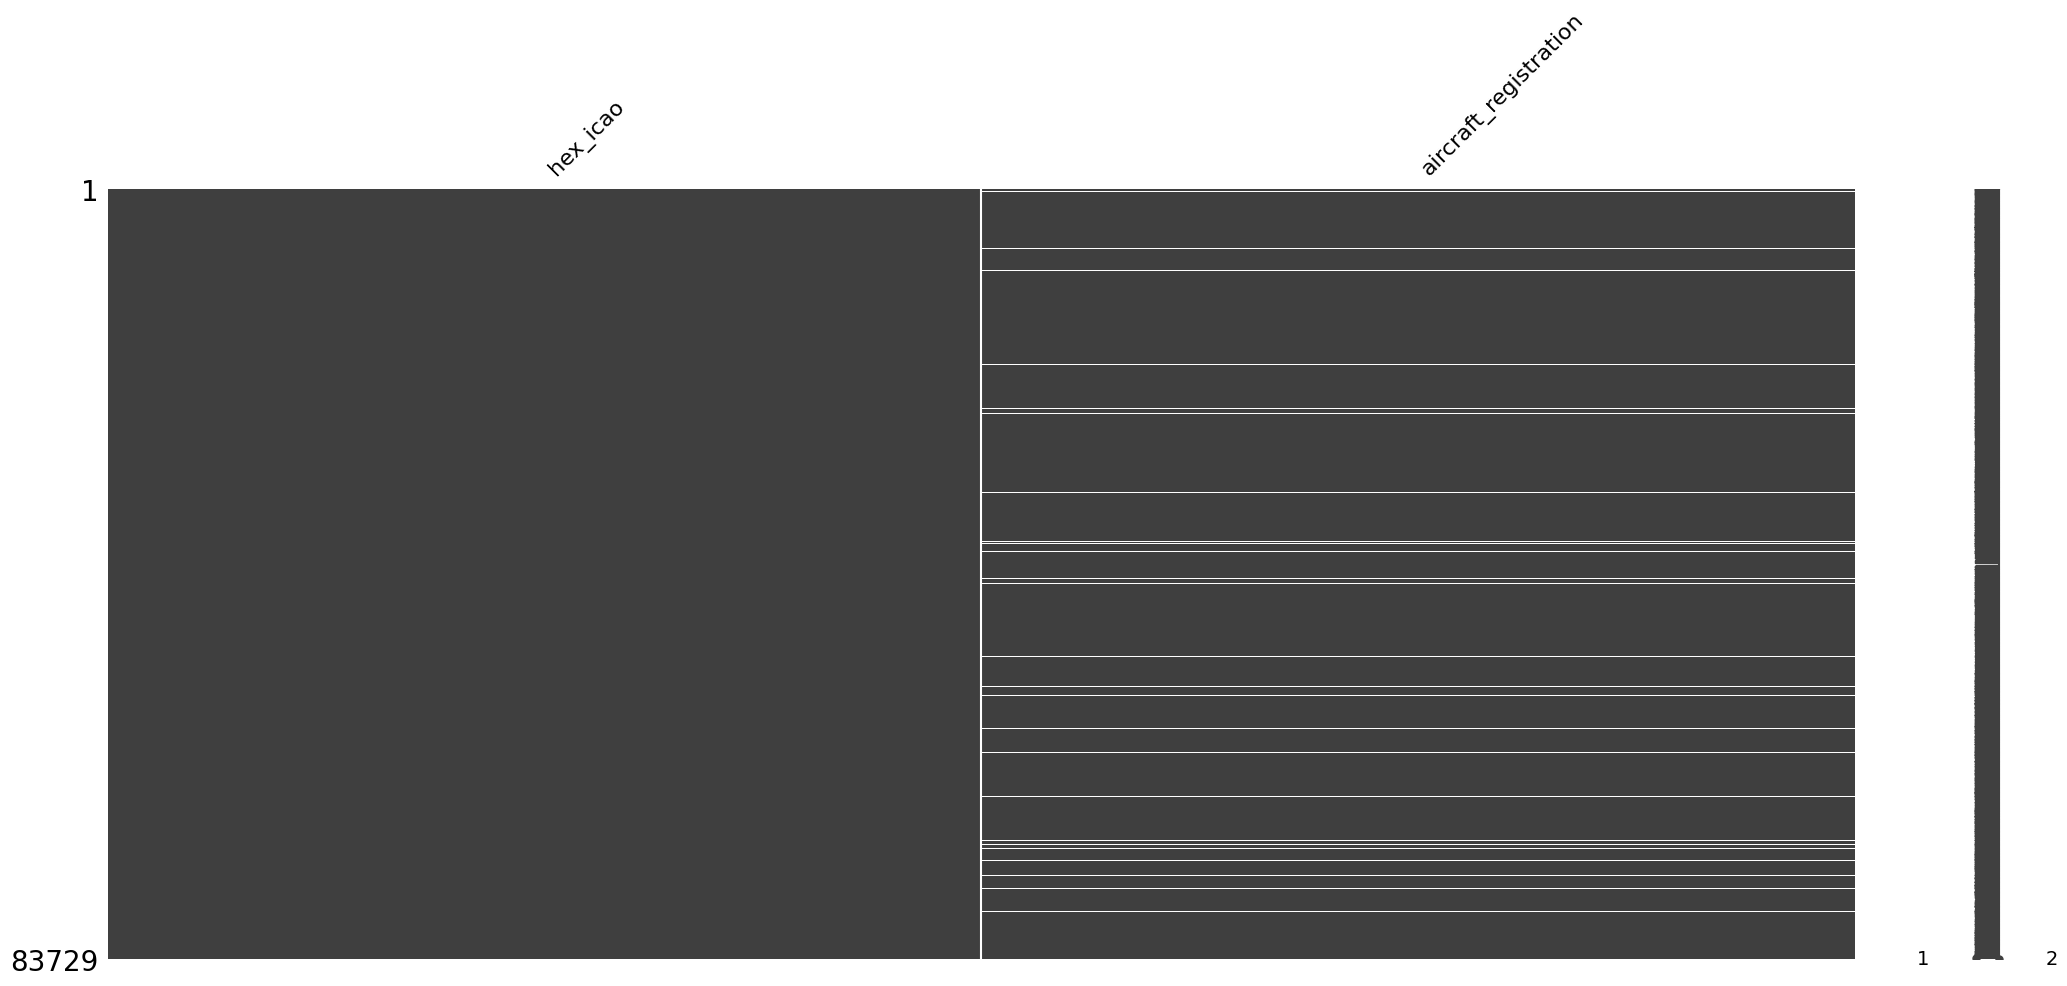

In [48]:
cols = ["hex_icao", "aircraft_registration"]
msno.matrix(df[cols])
plt.show()

In [59]:
missing_regs_hex = df[df['aircraft_registration'].isnull()]['hex_icao']
missing_regs_hex

8         7114EF
128       155C66
219       4BB1EE
287       4BB165
290       4BB164
           ...  
176041    733541
176413    711504
176418    151FEA
176728    706131
176730    4D20AB
Name: hex_icao, Length: 2114, dtype: str

In [ ]:
hex_with_null_reg = set(df[df['aircraft_registration'].isnull()]['hex_icao'].unique())
hex_with_full_reg = set(df[df['aircraft_registration'].notnull()]['hex_icao'].unique())
overlap = hex_with_null_reg.intersection(hex_with_full_reg)

In [61]:
overlap

set()

In [62]:
df['aircraft_registration'] = df['aircraft_registration'].fillna("UNKNOWN")

In [63]:
df.isnull().sum()

date                      0
day_of_week               0
hour_ist                  0
hex_icao                  0
aircraft_type             0
aircraft_registration     0
airline_name_english      0
callsign_code_iata        0
callsign_code_icao        0
airline_iata              0
airline_icao              0
dep_code_iata             0
dep_code_icao             0
dep_name_english          0
dest_code_iata            0
dest_code_icao            0
dest_name_english         0
dest_lat                  0
dest_lon                  0
dest_altitude             0
arr_sched_time_utc        0
arr_revised_time_utc     38
status                    0
dtype: int64

## Duplicate Data Control

In [65]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df[['hex_icao', 'arr_sched_time_utc', 'airline_name_english']].duplicated()

3         False
8         False
9         False
12        False
13        False
          ...  
176918    False
176938    False
176941    False
176942    False
176945    False
Length: 83729, dtype: bool

In [70]:
subset_cols = ['hex_icao', 'arr_sched_time_utc', 'airline_name_english']
df_duplicates = df[df.duplicated(subset=subset_cols, keep=False)]
df_duplicates

,date,day_of_week,hour_ist,hex_icao,aircraft_type,aircraft_registration,airline_name_english,callsign_code_iata,callsign_code_icao,airline_iata,airline_icao,dep_code_iata,dep_code_icao,dep_name_english,dest_code_iata,dest_code_icao,dest_name_english,dest_lat,dest_lon,dest_altitude,arr_sched_time_utc,arr_revised_time_utc,status
5636,2025-08-10,Sunday,16,4BAA6D,Airbus A321,TC-JSM,Turkish,TK 402,THY3HU,TK,THY,LED,ULLI,Saint-Petersburg,IST,LTFM,Istanbul Airport,41.2751,28.7519,325,2025-08-10 13:55:00+00:00,2025-08-10 13:10:00+00:00,Arrived
5637,2025-08-10,Sunday,16,4BAA6D,Boeing 777-300ER,TC-JSM,Turkish,TK 76,THY76Y,TK,THY,YVR,CYVR,Vancouver,IST,LTFM,Istanbul Airport,41.2751,28.7519,325,2025-08-10 13:55:00+00:00,2025-08-10 13:15:00+00:00,Arrived


In [71]:
df_final = df.drop_duplicates(subset=['hex_icao', 'arr_sched_time_utc'], keep='first')

In [73]:
df_final.duplicated().sum()

np.int64(0)

In [74]:
df_final[['hex_icao', 'arr_sched_time_utc', 'airline_name_english']].duplicated().sum()

np.int64(0)

In [75]:
df = df_final

In [76]:
df.info()

<class 'pandas.DataFrame'>
Index: 83727 entries, 3 to 176945
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype             
---  ------                 --------------  -----             
 0   date                   83727 non-null  datetime64[s]     
 1   day_of_week            83727 non-null  str               
 2   hour_ist               83727 non-null  int64             
 3   hex_icao               83727 non-null  str               
 4   aircraft_type          83727 non-null  str               
 5   aircraft_registration  83727 non-null  str               
 6   airline_name_english   83727 non-null  str               
 7   callsign_code_iata     83727 non-null  str               
 8   callsign_code_icao     83727 non-null  str               
 9   airline_iata           83727 non-null  str               
 10  airline_icao           83727 non-null  str               
 11  dep_code_iata          83727 non-null  str               
 12  dep_code_icao      

In [80]:
import os
output_dir = '/Users/YGT/ist-airport-decision-support-system/data/silver/flight_information'
output_path = os.path.join(output_dir, 'flights_info_silver.parquet')
df.to_parquet(output_path, index=False, engine='pyarrow')